The idea here is to reproduce the MF+LHY critical atom number.

# import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# estimate_nc folder is ../../estimate_nc. Add it to the sys.path
import sys
sys.path.append('../../estimate_nc')
from estimate_nc import get_optimal_sr_sz, en_per_particle
sys.path.append('../egpe')
from egpe import eGPE


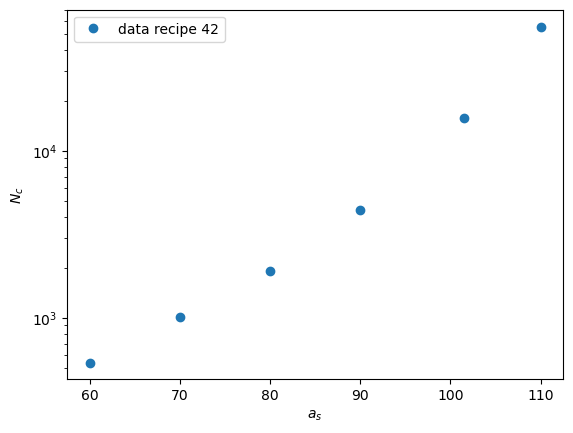

In [2]:
#   load data from ../../results/critical-atom-numbers/recipe-42-nc/functionals_E_N.dat
data = np.loadtxt('../../results/critical-atom-numbers/recipe-42-nc/functionals_E_N.dat')
a_s_arr = data[:,0]
n_c_arr = data[:,1]

# plot data
plt.plot(a_s_arr, n_c_arr, 'o', label='data recipe 42')

# set log scale
plt.yscale('log')

# set axis labels
plt.xlabel(r'$a_s$')
plt.ylabel(r'$N_c$')

# set legend
plt.legend()

# Example

Explore how much the values of sr and sz change when the number of atoms is changed.

In [3]:
# # set an eGPE object with a_s = 90, nparticles = 3*10**5, and include_ho = False.

# for a_s, n_c in zip(a_s_arr, n_c_arr):
    
#     print("------------------")
#     print(a_s)
    
#     # set nparticles
#     nparticles = 2 * n_c

#     # Initialize the eGPE object
#     gp = eGPE(a_s=a_s, nparticles=nparticles)

#     # get alpha, beta, gamma
#     alpha, beta, gamma = gp.alpha_mflhy, gp.beta_mflhy, gp.gamma_mflhy
#     print(f"alpha: {alpha}, beta: {beta}, gamma: {gamma}")
    
#     # Get the optimal sr and sz
#     opt_params = get_optimal_sr_sz(alpha, beta, gamma, nparticles)
#     sr_start, sz_start, en_0 = opt_params["sr"], opt_params["sz"], opt_params["en_0"]

#     # print the sr and sz values for the local minima
#     print(f"a_s: {a_s}, nparticles: {nparticles}, sr_start: {sr_start}, sz_start: {sz_start}, en_0: {en_0}")
    
#     # Set the box size and the number of grid points, and update the grid parameters
#     gp.set_box_size(np.array([sr_start, sr_start, sz_start]) * 40)
#     gp.set_nxyz([64]*3)
#     gp.update_grid_params()
    
#     # Setting the gaussian wavefunction and normalizing it
#     gp.set_gaussian_psi(sr_start, sz_start)
#     gp.normalize_psi()

#     # Calculate the energy and print it
#     energy_contributions = gp.energy_contributions()
#     print(energy_contributions, sum(energy_contributions.values()) / gp.nparticles )
    


They don't change that much, so you can use the later values.

# Get critical atom number from 3D eGPE

In [4]:
# # set an eGPE object with a_s = 90, nparticles = 3*10**5, and include_ho = False.

# for a_s, n_c in zip(a_s_arr, n_c_arr):
    
#     print(a_s)
#     print("------------------")
    
#     # set nparticles
#     nparticles = 2 * n_c
    
#     # Initialize the eGPE object
#     gp = eGPE(a_s=a_s, 
#               nparticles=nparticles, 
#               nxyz=[32]*3,
#               contact_interaction=True,
#               dipolar_interaction=True)

#     # get alpha, beta, gamma
#     alpha, beta, gamma = gp.alpha_mflhy, gp.beta_mflhy, gp.gamma_mflhy

#     # Get the optimal sr and sz
#     opt_params = get_optimal_sr_sz(alpha, beta, gamma, nparticles)
#     sr_start, sz_start, en_0 = opt_params["sr"], opt_params["sz"], opt_params["en_0"]
    
#     # Print the initial parameters
#     print(f"a_s: {a_s}, nparticles: {nparticles}, sr_start: {sr_start}, sz_start: {sz_start}, en_0: {en_0}")
    
#     # Set box_size
#     gp.set_box_size(np.array([sr_start, sr_start, sz_start]) * 40)
    
#     gp.set_gaussian_psi(sr_start, sz_start)
#     # normalize the wavefunction
#     gp.normalize_psi()
    
#     nparticles_start = nparticles
#     while nparticles_start > 0.5*n_c:
#         print(f"a_s={a_s}, nparticles_start={nparticles_start}")
#         gp.nparticles = nparticles_start
        
#         # Starting the 3D minimization
#         print("Starting the 3D minimization")
        
#         gp.set_gaussian_psi(sr_start, sz_start)
#         # normalize the wavefunction
#         gp.normalize_psi()
        
#         energy_contributions = gp.energy_contributions()
#         # print initial energy contributions
#         print("Initial energy contributions:", energy_contributions, sum(energy_contributions.values()))
        
#         # Initialize the evolution
#         dt = 100
#         t_max = 1E+10
#         gp.evolve(dt=dt, t_max=t_max, time_prop="imag", verbose=False) 
        
        
#         # calculate <x>, <y>, <z> using get_avg_abs_x, get_avg_abs_y, get_avg_abs_z
#         avg_abs_x = gp.get_avg_abs_x()
#         avg_abs_y = gp.get_avg_abs_y()
#         avg_abs_z = gp.get_avg_abs_z()
        
#         # Calculate the energy contributions
#         energy_contributions = gp.energy_contributions()
#         # get the total energy
#         energy = sum(energy_contributions.values())
        
#         # Print avg_abs_x/sr_start, avg_abs_y/sr_start, avg_abs_z/sz_start, energy
#         print("avg_abs_x/sr_start: ", avg_abs_x/sr_start)
#         print("avg_abs_y/sr_start: ", avg_abs_y/sr_start)
#         print("avg_abs_z/sz_start: ", avg_abs_z/sz_start)
#         print("energy: ", energy)
        
        
#         # The while loop breaks when avg_abs_x / sr_start > 100 or avg_abs_y / sr_start > 100 or avg_abs_z / sz_start > 100
#         if avg_abs_x / sr_start > 100 or avg_abs_y / sr_start > 100 or avg_abs_z / sz_start > 100:
#             print("The while loop breaks when avg_abs_x / sr_start > 100 or avg_abs_y / sr_start > 100 or avg_abs_z / sz_start > 100")
#             print("avg_abs_x / sr_start: ", avg_abs_x / sr_start)
#             print("avg_abs_y / sr_start: ", avg_abs_y / sr_start)
#             print("avg_abs_z / sz_start: ", avg_abs_z / sz_start)
#             break
        
#         nparticles_start = nparticles_start * 0.9
        
        
        

        

In [33]:
gp = eGPE(a_s=110.0, 
              nparticles=5*111181., 
              nxyz=[64]*3,
              box_size=np.array([80,80,1600])*40)

sr = 80
sz = 1540

gp.set_gaussian_psi(sr, sz)
gp.normalize_psi()

print(gp.energy_contributions(), sum(gp.energy_contributions().values()) / gp.nparticles)

# Calculate the analytical variational energy and print it
en_analytic = en_per_particle(sr, sz, gp.nparticles, gp.alpha, gp.beta, gp.gamma, include_ho=False)

print("Analytic energy ",en_analytic)
print("Relative difference in analytic and total E (in percentage)", 100 * (en_analytic - sum(gp.energy_contributions().values()) / gp.nparticles ) / en_analytic)

[INFO] Initializing psi
{'kinetic': 43.48867838662989, 'pot_ext': 1.5074294211810328e-19, 'pot_int': 69.15422376697582} 0.0002026297697513167
Analytic energy  0.00015161134928635766
Relative difference in analytic and total E (in percentage) -33.65079244074098
